In [97]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

In [27]:
with open('enable1.txt', 'r') as f:
    myNames = [line.strip() for line in f]

In [28]:
#Find number of two and three letter sequences
num_words = len(myNames)
num_letters = 0
for string in myNames:
    num_letters += len(string)
num_twoletter_seqs = num_letters-num_words
num_threeletter_seqs = num_letters-(2*num_words)


print "Number of two letter sequences in English language: ", num_twoletter_seqs
print "Number of three letter sequences in English language: ", num_threeletter_seqs

Number of two letter sequences in English language:  1397688
Number of three letter sequences in English language:  1224868


In [43]:

#Find most common two and three letter sequences
oneseq = []
twoseq = []
threeseq = []
for i in myNames:
    N = len(i)
    if N>=1:
        for j in i:
            oneseq.append(j)
    if N >= 2:
        for j in np.arange(0,N-1):
            twoseq.append(i[j:j+2])
    if N >=3:
        for j in np.arange(0,N-2):
            threeseq.append(i[j:j+3])
oneseq = Counter(oneseq)
twoseq = Counter(twoseq)
threeseq = Counter(threeseq)            

In [44]:
#frequencies of each letter assuming all words equally probable:
for i in oneseq.keys():
    oneseq[i]/=float(num_letters)
print oneseq

Counter({'e': 0.11511816558718581, 's': 0.0951622022937801, 'i': 0.09007467647410901, 'a': 0.07566850980701785, 'r': 0.07071660889342811, 'n': 0.06846128768525853, 't': 0.06683506228557894, 'o': 0.06592516561520222, 'l': 0.05312102835515642, 'c': 0.040863847875973885, 'd': 0.0338336385424334, 'u': 0.032663953319562844, 'p': 0.029379665687790192, 'm': 0.028353246210780208, 'g': 0.027012915566173492, 'h': 0.023236430505288733, 'b': 0.0183609379894913, 'y': 0.016324017451678056, 'f': 0.012311303094285415, 'v': 0.009782185127360064, 'k': 0.008474328051815081, 'w': 0.007442814681618941, 'z': 0.004738594136419553, 'x': 0.0029353559485211156, 'q': 0.001614127403362479, 'j': 0.0015899314107282484})


In [102]:
#Count number of words beginning with 'word'
def word_counter(word):
    count = 0
    for i in myNames:
        if len(i) >= len(word):
            if i[:len(word)] == word:
                count +=1
    return count
            

wombat = 'wombat '
Info = []
N_m = [num_words]
for i in range(len(wombat)):
    pn = float(word_counter(wombat[:i+1]))/ float(N_m[i])
    N_m.append(word_counter(wombat[:i+1]))
    if pn == 0:
        Info.append(1.0)
    else:
        Info.append(-1*np.log2(pn))
sum(Info)

17.39891066086852

In [94]:
#Cumulative information gain for 15 letter words
fifteenletters = [i for i in myNames if len(i)==15]

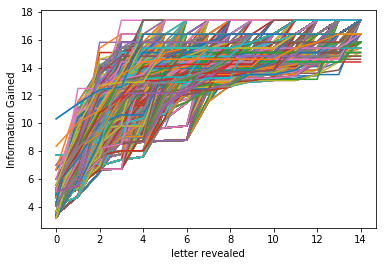

In [106]:
plt.figure()
for i in fifteenletters:
    Info = []
    N_m = [num_words]
    for j in range(len(i)): 
        pn = float(word_counter(i[:j+1]))/float(N_m[j])
        N_m.append(word_counter(i[:j+1]))
        if pn == 0.0:
            Info.append(1.0)
        else:
            Info.append(-1*np.log2(pn))
    Info = np.cumsum(Info)
    plt.plot(range(len(Info)),Info)
plt.xlabel('letter revealed')
plt.ylabel('Information Gained')
plt.show()
        